Analysis of the titanic dataset

In [8]:
# import Python libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# load the titanic dataset from the seaborn library (as pandas DataFrame) and print all columns

titanic = sns.load_dataset('titanic')
print(titanic, pd.set_option('display.max_columns', None))

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [ ]:
# there are columns which can be filtered e.g. 'adult_male', 'embarked' and 'who' which contain information that is not useful for our analysis
titanic_filtered = titanic.drop(columns = ['adult_male', 'embarked', 'who'])
print(titanic_filtered, pd.set_option('display.max_columns', None))

     survived  pclass     sex   age  sibsp  parch     fare   class deck  \
0           0       3    male  22.0      1      0   7.2500   Third  NaN   
1           1       1  female  38.0      1      0  71.2833   First    C   
2           1       3  female  26.0      0      0   7.9250   Third  NaN   
3           1       1  female  35.0      1      0  53.1000   First    C   
4           0       3    male  35.0      0      0   8.0500   Third  NaN   
..        ...     ...     ...   ...    ...    ...      ...     ...  ...   
886         0       2    male  27.0      0      0  13.0000  Second  NaN   
887         1       1  female  19.0      0      0  30.0000   First    B   
888         0       3  female   NaN      1      2  23.4500   Third  NaN   
889         1       1    male  26.0      0      0  30.0000   First    C   
890         0       3    male  32.0      0      0   7.7500   Third  NaN   

     embark_town alive  alone  
0    Southampton    no  False  
1      Cherbourg   yes  False  
2  

In [11]:
#The dataset contains missing information (NaN). lets check which columns are affected

missing_information = titanic_filtered.isna().sum()
print(missing_information)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
class            0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
# The column 'deck' contains a lot of missing data and is not relevant for our analysis. Thus it can be removed.
# 'embark town' contains two NaN values and are also removed
# the NaN values of the column 'age' are not used in panad Dataframe calculations and therefore can stay
# In case this causes problems the NaN values of the column 'age' can be exchanged with either the average age
# or a random distribution of all ages on the Titanic

titanic_filtered_remove_deck = titanic_filtered.drop("deck", axis = 1)
titanic_filtered_cleaned = titanic_filtered_remove_deck.dropna(subset = "embark_town")
missing_info_after_clean = titanic_filtered_cleaned.isna().sum()
print(missing_info_after_clean, pd.set_option('display.max_columns', None))

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
class            0
embark_town      0
alive            0
alone            0
dtype: int64 None


In [44]:
# example of using a for loop for couting female and male persons in the pandas Titantic DataFrame
women = 0
men = 0

for person in titanic_filtered_cleaned["sex"]:
    if person == "female":
        women +=1
    else:
        men +=1
print(f"Total people on the titanic: {women + men} \n{'.'*50}\nwomen: {women}\nmen: {men}")

Total people on the titanic: 889 
..................................................
women: 312
men: 577


In [14]:
# analyzing the age of the passenger sof teh titanic

av_age = titanic_filtered_cleaned["age"].mean()
print(f"The average age of passengers of the Titantic was: {av_age:.1f} years old")
max_age= titanic_filtered_cleaned["age"].max()
print(f"The oldest person on the Titanic was: {max_age:.1f} years old")
min_age = titanic_filtered_cleaned["age"].min()
print(f"The youngest person on the Titanic was: {min_age:.1f} years old")

The average age of passengers of the Titantic was: 29.6 years old
The oldest person on the Titanic was: 80.0 years old
The youngest person on the Titanic was: 0.4 years old


In [40]:
# plot - gender and class
women_first_class = len(titanic_filtered_cleaned[(titanic_filtered_cleaned["sex"] == "female") & (titanic_filtered_cleaned["pclass"]==1)])
women_second_class = len(titanic_filtered_cleaned[(titanic_filtered_cleaned["sex"] == "female") & (titanic_filtered_cleaned["pclass"]==2)])
women_third_class = len(titanic_filtered_cleaned[(titanic_filtered_cleaned["sex"] == "female") & (titanic_filtered_cleaned["pclass"]==3)])

men_first_class = len(titanic_filtered_cleaned[(titanic_filtered_cleaned["sex"] == "male") & (titanic_filtered_cleaned["pclass"]==1)])
men_second_class = len(titanic_filtered_cleaned[(titanic_filtered_cleaned["sex"] == "male") & (titanic_filtered_cleaned["pclass"]==2)])
men_third_class = len(titanic_filtered_cleaned[(titanic_filtered_cleaned["sex"] == "male") & (titanic_filtered_cleaned["pclass"]==3)])

print("Distribution of genders across the three passenger classes on the Titanic:")
print("-"*len("Distribution of genders across the three passenger classes on the Titanic:"))
print(f"First class:\nwomen: {women_first_class}\nmen: {men_first_class}")
print("**********")
print(f"Second class:\nwomen: {women_second_class}\nmen: {men_second_class}")
print("**********")
print(f"Third class:\nwomen: {women_third_class}\nmen: {men_third_class}")




Distribution of genders across the three passenger classes on the Titanic:
--------------------------------------------------------------------------
First class:
women: 92
men: 122
**********
Second class:
women: 76
men: 108
**********
Third class:
women: 144
men: 347


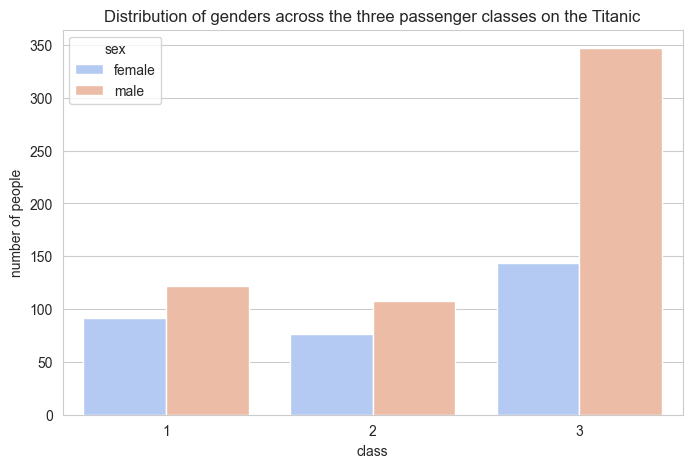

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic_filtered_cleaned, x="pclass", hue="sex", palette="coolwarm")
plt.xlabel("class")
plt.ylabel("number of people")
plt.title("Distribution of genders across the three passenger classes on the Titanic")
plt.show()

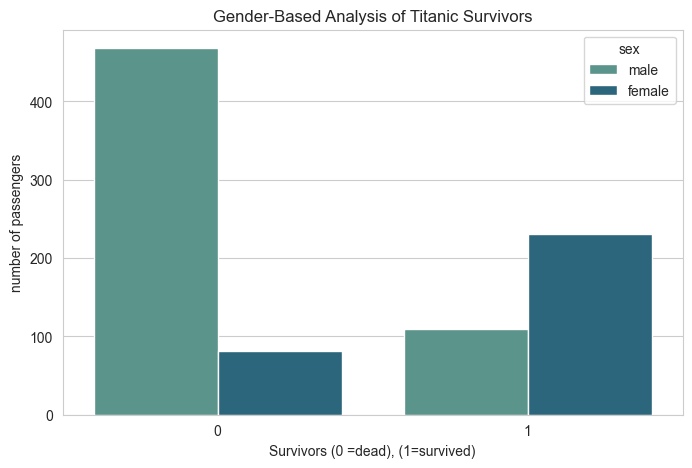

In [22]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
sns.countplot(data=titanic_filtered_cleaned, x = "survived", hue = "sex", palette ="crest")
plt.xlabel("Survivors (0 =dead), (1=survived)")
plt.ylabel("number of passengers")
plt.title("Gender-Based Analysis of Titanic Survivors")
plt.show()

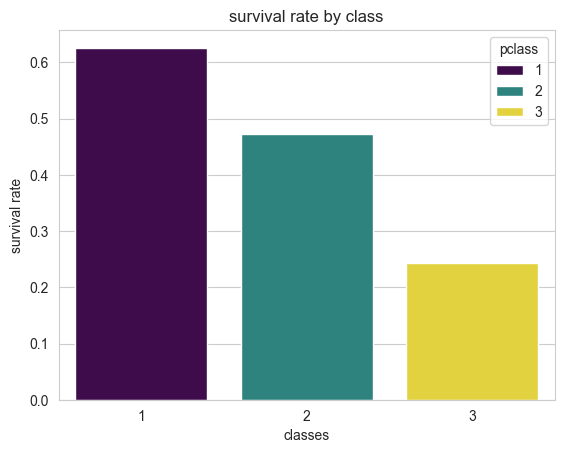

In [18]:
#survival rate according to class

survivor_gender =titanic_filtered_cleaned.groupby('sex')['survived'].mean()
survivor_class = titanic_filtered_cleaned.groupby("pclass")["survived"].mean()

sns.barplot(x=survivor_class.index, y = survivor_class.values, hue = survivor_class.index, palette = "viridis")
plt.xlabel("classes")
plt.ylabel("survival rate")
plt.title("survival rate by class")
plt.show()


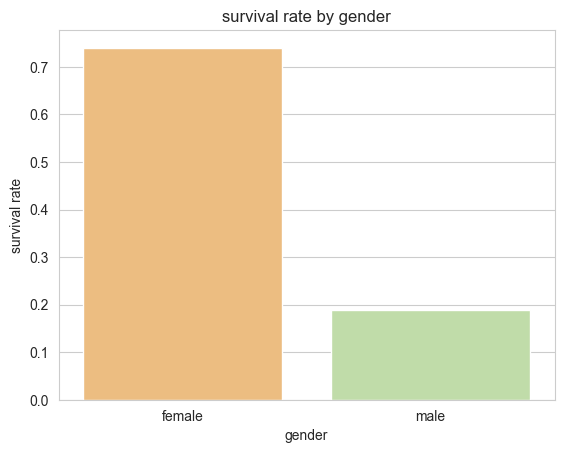

In [30]:
#survival rate according to class

survivor_gender =titanic_filtered_cleaned.groupby('sex')['survived'].mean()
sns.barplot(x=survivor_gender.index, y = survivor_gender.values, hue = survivor_gender.index, palette = "Spectral")
plt.xlabel("gender")
plt.ylabel("survival rate")
plt.title("survival rate by gender")
plt.show()


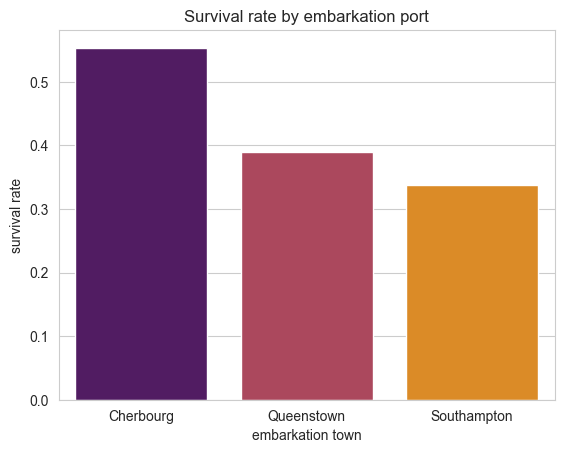

In [20]:
#Survival rate by embarkation port
survival_embark_town = titanic_filtered_cleaned.groupby("embark_town")["survived"].mean().reset_index()
sns.barplot(data = survival_embark_town, x="embark_town", y="survived", hue="embark_town" , palette ="inferno")
plt.xlabel("embarkation town")
plt.ylabel("survival rate")
plt.title("Survival rate by embarkation port")
plt.show()


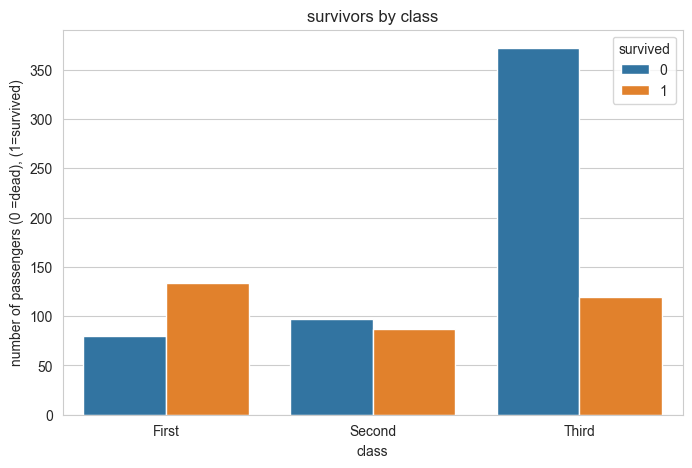

In [24]:
# survival rate according to class
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
sns.countplot(data=titanic_filtered_cleaned, x = "class", hue = "survived", palette ="tab10")
plt.xlabel("class")
plt.ylabel("number of passengers (0 =dead), (1=survived)")
plt.title("survivors by class")
plt.show()